<a href="https://colab.research.google.com/github/Rahulhimself/Covid19-Analysis/blob/main/Covid19Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Covid_19_Clean_Complete (1).csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.shape

(49068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.rename(columns={'Province/State':'State',
           'Country/Region':'Country'}, inplace = True)
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.Date.value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [ ]:
df['Date'].max() #checking max date

'2020-07-27'

In [ ]:
top = df[df['Date'] == '2020-07-27']
top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
top.groupby(by='Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


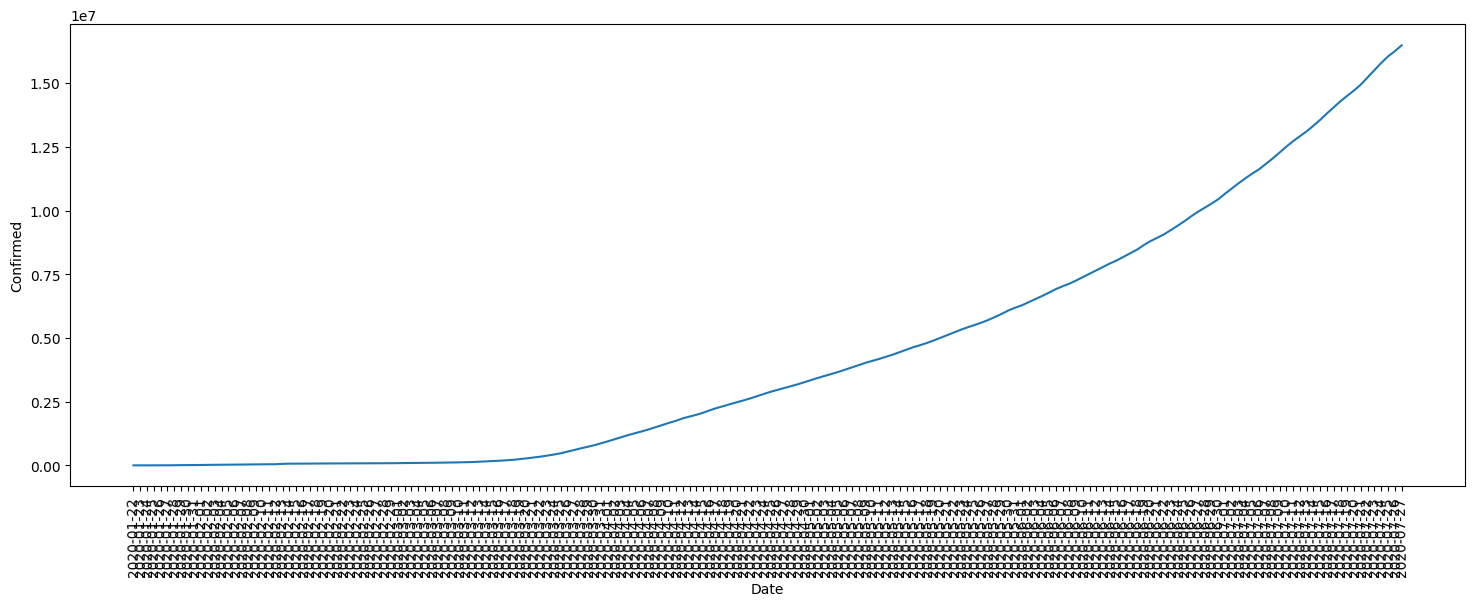

In [ ]:
plt.figure(figsize = (18,6))
sns.lineplot(data=confirmed, x='Date', y='Confirmed')
plt.xticks(rotation=91)
plt.show()            #>>>>>>>>visualize confirmed cases

In [ ]:
top_10_recovered = df.groupby(by='Country')['Recovered'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_recovered

,Country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


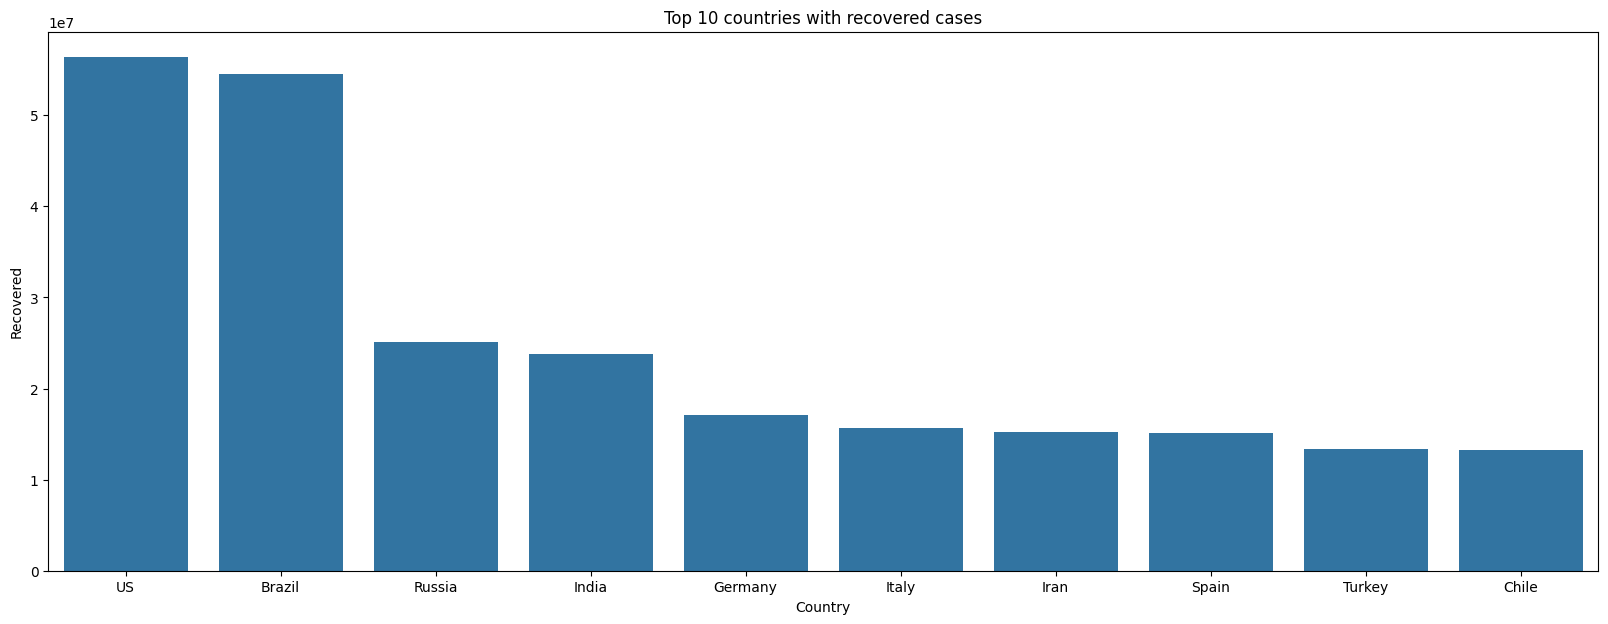

In [ ]:
plt.figure(figsize = (20,7))
sns.barplot(data = top_10_recovered, x = 'Country', y='Recovered')
plt.title('Top 10 countries with recovered cases')
plt.show() #------------------------------------->>>>visualize recovered casses

In [ ]:
top_10_deaths = df.groupby(by='Country')['Deaths'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_deaths#---------->>top10 countries with deaths

,Country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


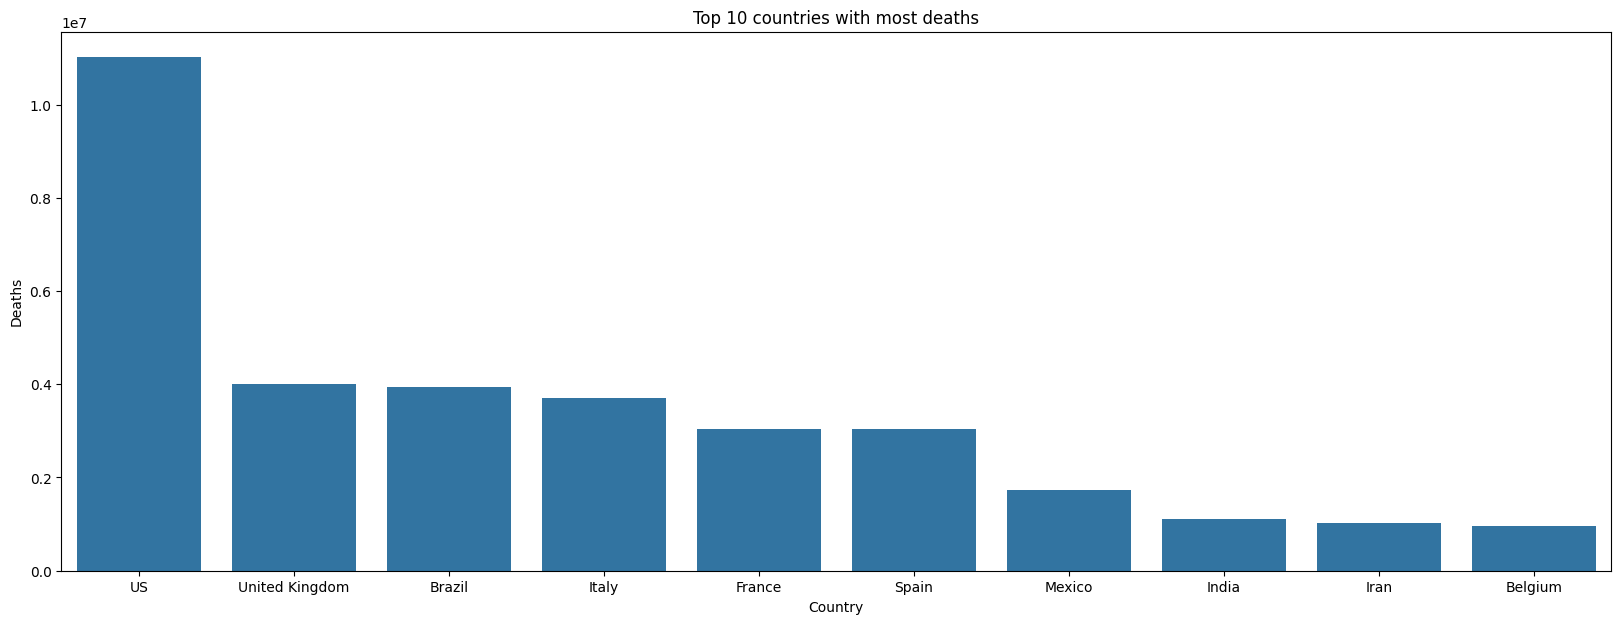

In [ ]:
plt.figure(figsize = (20,7))
sns.barplot(data = top_10_deaths, x = 'Country', y = 'Deaths')
plt.title('Top 10 countries with most deaths')
plt.show()#------------------------>>>>>>>>>visualize deaths

In [ ]:
#top ten countries with active casses
top_10_active = df.groupby(by='Country')['Active'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


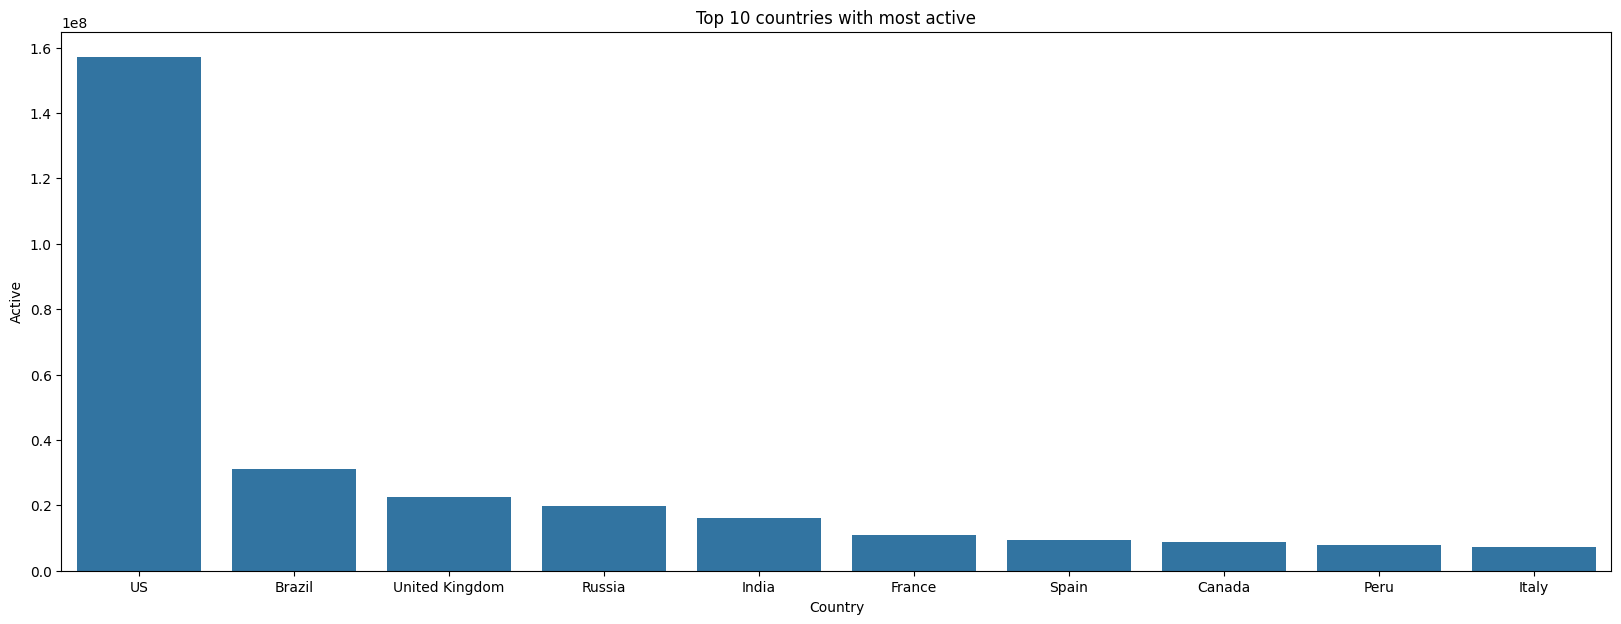

In [ ]:
# Visualizing active case
plt.figure(figsize = (20,7))
sns.barplot(data = top_10_active, x = 'Country', y = 'Active')
plt.title('Top 10 countries with most active')
plt.show()

country based analysis

India, Spain and Canada

In [ ]:
# Creating INDIDA dataset which have country as India
IND = df[df['Country'] == 'India']
IND.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [ ]:
IND = IND.groupby(by='Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
IND

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


In [ ]:
# Creating China dataset which have country as China
Canada = df[df['Country'] == 'Canada']
Canada.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
35,Alberta,Canada,53.9333,-116.5765,2020-01-22,0,0,0,0,Americas
36,British Columbia,Canada,53.7267,-127.6476,2020-01-22,0,0,0,0,Americas
37,Manitoba,Canada,53.7609,-98.8139,2020-01-22,0,0,0,0,Americas
38,New Brunswick,Canada,46.5653,-66.4619,2020-01-22,0,0,0,0,Americas
39,Newfoundland and Labrador,Canada,53.1355,-57.6604,2020-01-22,0,0,0,0,Americas


In [ ]:
Spain = df[df['Country'] == 'Spain']
Spain.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
199,NaN,Spain,40.463667,-3.74922,2020-01-22,0,0,0,0,Europe
460,NaN,Spain,40.463667,-3.74922,2020-01-23,0,0,0,0,Europe
721,NaN,Spain,40.463667,-3.74922,2020-01-24,0,0,0,0,Europe
982,NaN,Spain,40.463667,-3.74922,2020-01-25,0,0,0,0,Europe
1243,NaN,Spain,40.463667,-3.74922,2020-01-26,0,0,0,0,Europe


In [ ]:
Spain = Spain.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
Spain

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,270166,28429,150376,91361
184,2020-07-24,272421,28432,150376,93613
185,2020-07-25,272421,28432,150376,93613
186,2020-07-26,272421,28432,150376,93613


**Compare these countries on the basis of Recovered cases**

Text(0, 0.5, 'No. of Recovered')

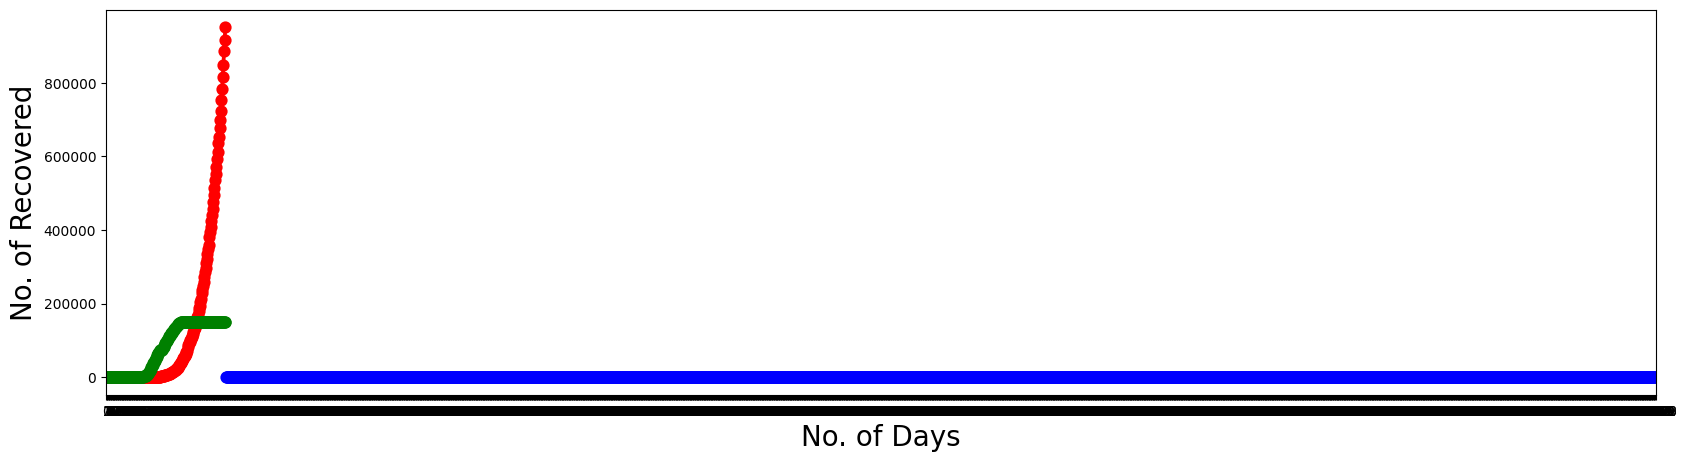

In [ ]:
#visualize using plots
plt.figure(figsize=(20,5))

sns.pointplot(x=IND.index, y = IND.Recovered, color = 'Red')
sns.pointplot(x=Canada.index, y=Canada.Recovered, color = 'Blue')
sns.pointplot(x=Spain.index, y=Spain.Recovered, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)

Comparing countries on the basis of Deaths occured

Text(0, 0.5, 'No. of Recovered')

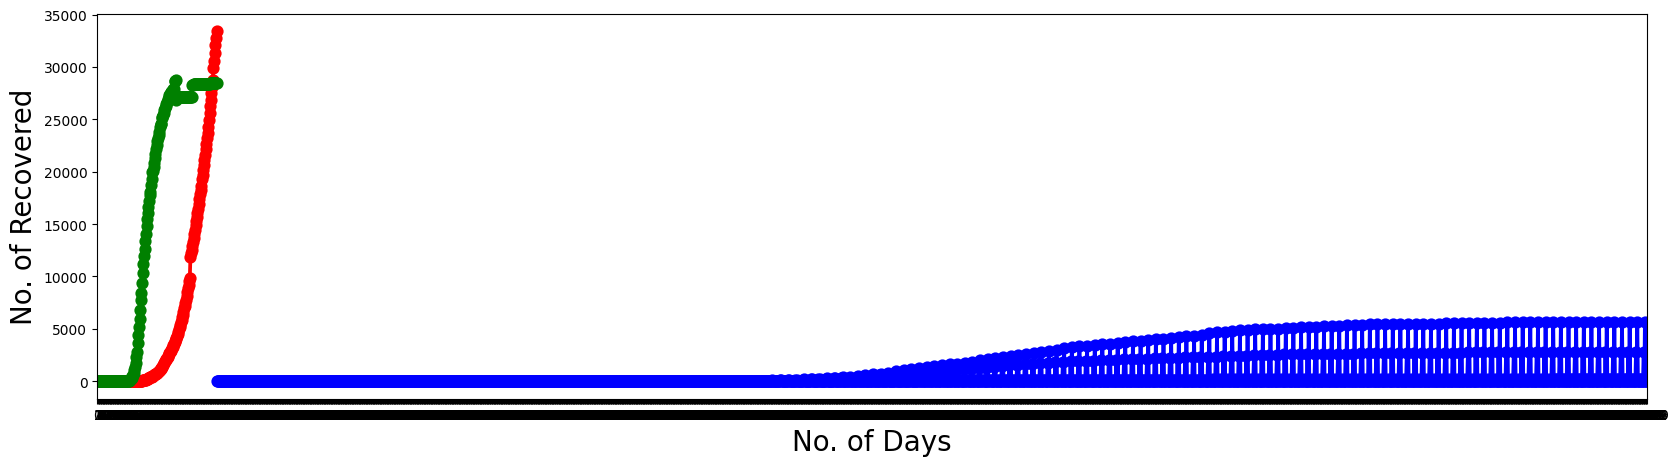

In [ ]:
plt.figure(figsize=(20,5))

sns.pointplot(x=IND.index, y = IND.Deaths, color = 'Red')
sns.pointplot(x=Canada.index, y=Canada.Deaths, color = 'Blue')
sns.pointplot(x=Spain.index, y=Spain.Deaths, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)

Comparing these contries on basis of actice casses

Text(0, 0.5, 'No. of Recovered')

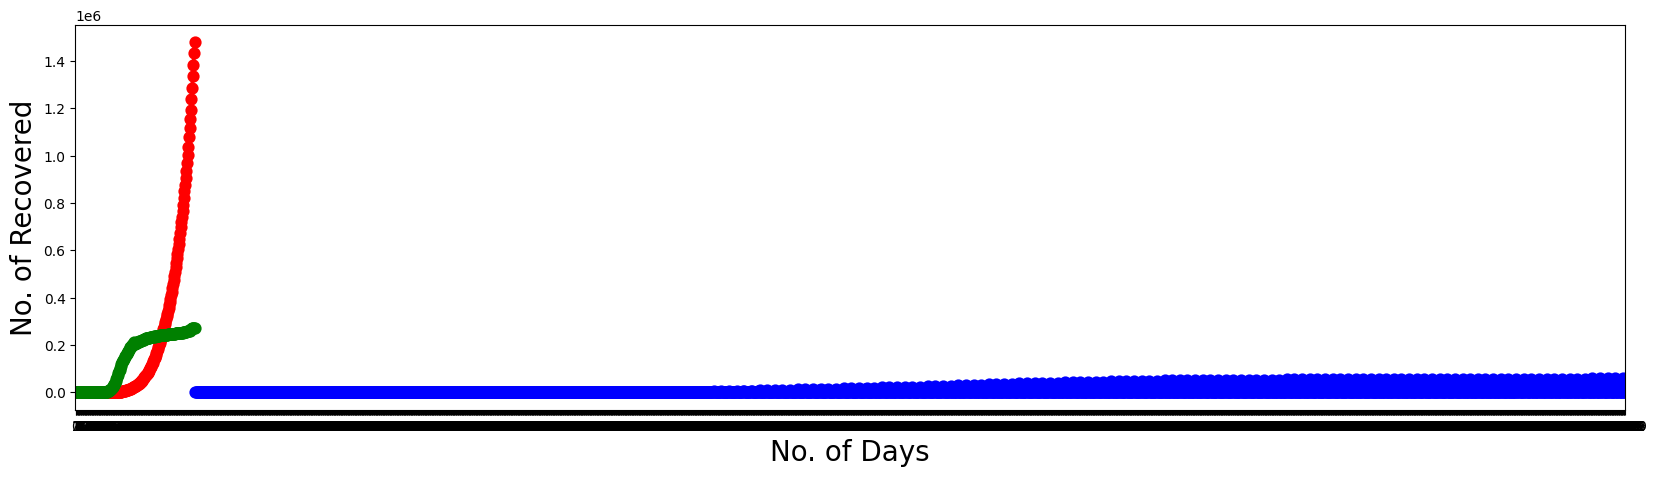

In [ ]:
plt.figure(figsize=(20,5))

sns.pointplot(x=IND.index, y = IND.Confirmed, color = 'Red')
sns.pointplot(x=Canada.index, y=Canada.Confirmed, color = 'Blue')
sns.pointplot(x=Spain.index, y=Spain.Confirmed, color = 'Green')

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)

MODEL BUILDING

In [ ]:
# Intalling prophet
!pip install prophet

In [ ]:
df1 = pd.read_csv('/content/Covid_19_Clean_Complete (1).csv', parse_dates=['Date'])
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
confirmed = df1.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
deaths = df1.groupby(by='Date').sum()['Deaths'].reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
recovered = df1.groupby(by='Date').sum()['Recovered'].reset_index()
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [ ]:
# creating new dataset of Active cases
active = df1.groupby(by='Date').sum()['Active'].reset_index()
active.head()

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


Forecasting for confirmed cases

In [ ]:
confirmed.columns = ['ds','y']
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
from prophet import Prophet
m = Prophet()

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5h6m3q4g/qtp2tada.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5h6m3q4g/atjrsog3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52857', 'data', 'file=/tmp/tmp5h6m3q4g/qtp2tada.json', 'init=/tmp/tmp5h6m3q4g/atjrsog3.json', 'output', 'file=/tmp/tmp5h6m3q4g/prophet_modely5198ov5/prophet_model-20250809100842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:08:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making prediction for next 15 dates
future = m.make_future_dataframe(periods=15)

forecast = m.predict(future)
forecast.tail(9)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
194,2020-08-03,1.756099e+07,1.744705e+07,1.767899e+07,1.752004e+07,1.759826e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,1.755889e+07
195,2020-08-04,1.776498e+07,1.762899e+07,1.787078e+07,1.771195e+07,1.781275e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,1.774813e+07
196,2020-08-05,1.796897e+07,1.783114e+07,1.808366e+07,1.790275e+07,1.802685e+07,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,1.795791e+07
197,2020-08-06,1.817296e+07,1.803472e+07,1.830402e+07,1.809577e+07,1.824308e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.817184e+07
198,2020-08-07,1.837695e+07,1.823403e+07,1.852701e+07,1.828688e+07,1.846249e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.838703e+07
199,2020-08-08,1.858094e+07,1.844702e+07,1.875628e+07,1.847622e+07,1.868042e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.859469e+07
200,2020-08-09,1.878493e+07,1.863360e+07,1.894634e+07,1.866618e+07,1.889876e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.879223e+07
201,2020-08-10,1.898892e+07,1.880444e+07,1.915413e+07,1.885430e+07,1.911755e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,1.898682e+07
202,2020-08-11,1.919291e+07,1.898277e+07,1.936299e+07,1.904020e+07,1.933740e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,1.917607e+07


In [ ]:
forecast_next_15_days = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)
forecast_next_15_days

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.621487e+07,1.642478e+07
189,2020-07-29,1.652997e+07,1.642460e+07,1.663947e+07
190,2020-07-30,1.674391e+07,1.664026e+07,1.685035e+07
191,2020-07-31,1.695910e+07,1.684401e+07,1.706441e+07
192,2020-08-01,1.716676e+07,1.705461e+07,1.726889e+07
193,2020-08-02,1.736430e+07,1.725324e+07,1.747170e+07
194,2020-08-03,1.755889e+07,1.744705e+07,1.767899e+07
195,2020-08-04,1.774813e+07,1.762899e+07,1.787078e+07
196,2020-08-05,1.795791e+07,1.783114e+07,1.808366e+07
197,2020-08-06,1.817184e+07,1.803472e+07,1.830402e+07


In [ ]:
1.632020*10**15

1632020000000000.0

In [ ]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.067684e+04,8.540343e+04,-1.235916e+05
1,2020-01-23,-8.050948e+03,1.007907e+05,-1.102746e+05
2,2020-01-24,5.827455e+03,1.130789e+05,-9.981373e+04
3,2020-01-25,1.217668e+04,1.148664e+05,-9.544289e+04
4,2020-01-26,8.405020e+03,1.209208e+05,-9.830897e+04
...,...,...,...,...
198,2020-08-07,1.838703e+07,1.852701e+07,1.823403e+07
199,2020-08-08,1.859469e+07,1.875628e+07,1.844702e+07
200,2020-08-09,1.879223e+07,1.894634e+07,1.863360e+07
201,2020-08-10,1.898682e+07,1.915413e+07,1.880444e+07


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.235916e+05,8.540343e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.102746e+05,1.007907e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.981373e+04,1.130789e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.544289e+04,1.148664e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.830897e+04,1.209208e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2020-08-07,1.837695e+07,1.823403e+07,1.852701e+07,1.828688e+07,1.846249e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.838703e+07
199,2020-08-08,1.858094e+07,1.844702e+07,1.875628e+07,1.847622e+07,1.868042e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.859469e+07
200,2020-08-09,1.878493e+07,1.863360e+07,1.894634e+07,1.866618e+07,1.889876e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.879223e+07
201,2020-08-10,1.898892e+07,1.880444e+07,1.915413e+07,1.885430e+07,1.911755e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,1.898682e+07


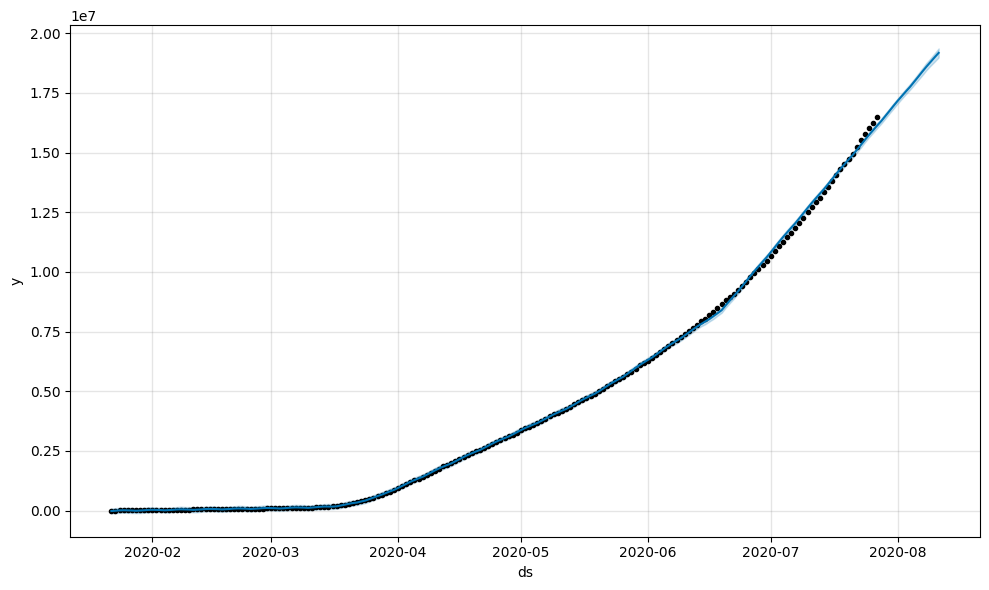

In [ ]:
m.plot(forecast)
plt.show()

In [ ]:
# Importing plotly library
import plotly
import plotly.express as px

In [ ]:
world = df1.groupby(by='Country/Region')[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()
world

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [ ]:
# visualizing using plotly
figure = px.choropleth(world,locations='Country/Region',
                        locationmode = 'country names',
                        color='Active',
                        hover_name='Country/Region', range_color=[1,20000],
                        color_continuous_scale='reds',
                        title='Countries with Active Cases')
figure.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here, we have analyzed the covid cases from dataset, picking three countries randomly and analysing the active, confirmed and recovered cases of covid with the help of pandas library, also visualizing it with matplotlib. In the end we used prophet library, built time series model for predicting the situation/future cases and finally visualizing it.